### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
#lets learn how to distinguish white noise

In [6]:
wn=np.random.normal(loc=df['market_value'].mean(),scale=df['market_value'].std(),size=len(df))

In [7]:
df['wn']=wn
df.describe()

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_971/555101470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn']=wn


,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.184315
std,292.559287,290.532509
min,438.920000,-45.496322
25%,914.620000,895.513654
50%,1144.650000,1092.101662
75%,1316.280729,1285.512488
max,1570.252238,2107.091731


Text(0.5, 1.0, 'white noise vs market value')

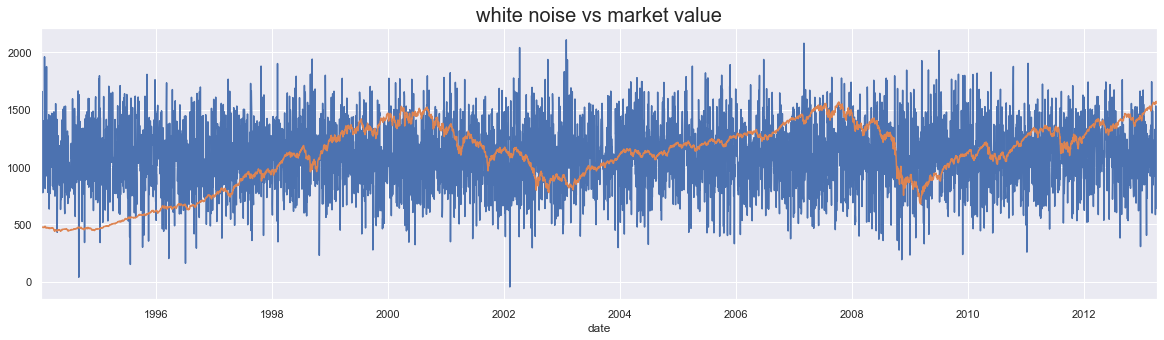

In [8]:
df.wn.plot(figsize=[20,5])
df.market_value.plot()
plt.title('white noise vs market value',size=20)

### Random Walk

In [9]:
rw=pd.read_csv('RandWalk.csv')
rw.date=pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [10]:
rw.asfreq('b')

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255
...,...
2013-04-01,2263.675474
2013-04-02,2225.000870
2013-04-03,2190.787688


In [11]:
df['rw']=rw.price

/var/folders/ws/jfyqgcz57_374tjld1g6w96m0000gn/T/ipykernel_971/3460816223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw']=rw.price


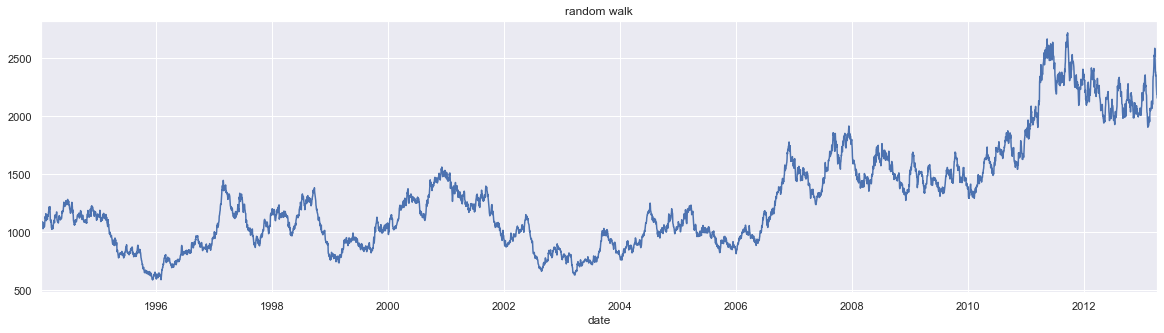

In [12]:
df.rw.plot(figsize=[20,5])
plt.title("random walk")
plt.show()

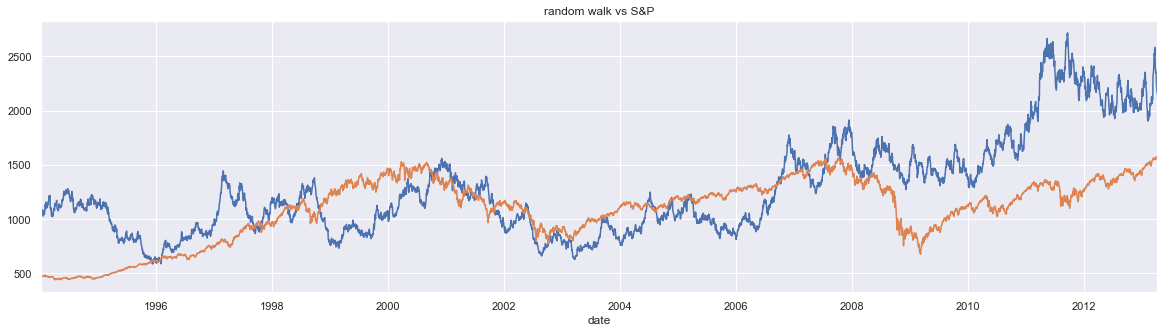

In [13]:
df.rw.plot(figsize=[20,5])
df.market_value.plot()
plt.title("random walk vs S&P")
plt.show()

### Stationarity

In [14]:
# we want to run the dickey-fuller test or DF test on the market value
#to find if it follows stationarity or not
# https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary

import statsmodels.tsa.stattools as sts

In [15]:
sts.adfuller(df['market_value'])
#Lets understand the meaning of above
#first line is test statistics

#second line is the p value, or the probability of given sample true if the 
#null hypothesis is true. here it is 41%, this suggests there is 41% chance of 
#not rejecting the null so we cant confirm the data is stationary.

#third line shows number of lags used in regression used to determine t statistics

#fourth is number of oberservations used. This and number of lags should sum 
#of total rows.

# 1%,5%,10%- are the critical values to compare to test statistics
#since t value is not less than any one of them, thus we cannot reject the null 

#last line provides the maximized information crieteria (?)

(-1.73698474523524,
 0.412164569677064,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [16]:
#lets try it for white noise, which is a a stationary process. so there should be less p value and 
#since there is no autocorrelation, there should be no lag in regression
sts.adfuller(df['wn'])

(-42.54545492708851,
 0.0,
 2,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 70729.60033293626)

In [17]:
#random walk
sts.adfuller(df['rw'])

#in random walk there is a 60% chance that data comes from non stationary process
#thus random walk, unlike white noise, rw is expected to be non stationary source.

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [18]:
# Testing for stationarity will feature in the analysis for any dataset we come across.

### Seasonality

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

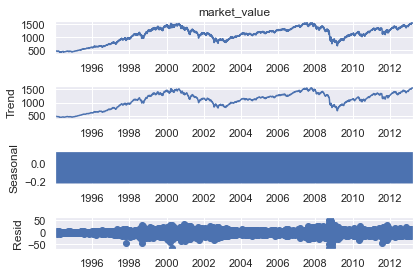

In [23]:
s_dec_add=seasonal_decompose(df['market_value'],model='additive')
s_dec_add.plot()
plt.show()

#### here no seasonality is observed in data. 
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

Level: The average value in the series.
Trend: The increasing or decreasing value in the series.
Seasonality: The repeating short-term cycle in the series.
Noise: The random variation in the series.

A series is thought to be an aggregate or combination of these four components.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.


MUST READ: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/


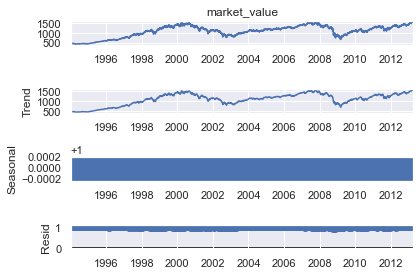

In [22]:
s_dec_mul=seasonal_decompose(df['market_value'],model='multiplicative')
s_dec_mul.plot()
plt.show()

### ACF

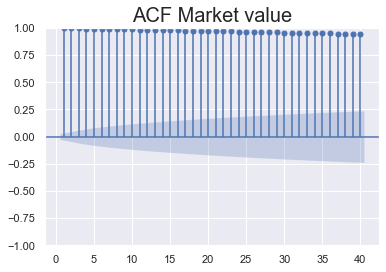

In [35]:
# we will use plot acf method of tsaplots for plotting the autocorrelation function of market value
# we will pass df['market_value'], then lags=40 means we are analysing last 40 lags of market value to see if 
# there is autocorrelation or not. Zero=false means, we are not using lag=0, i,e autocorrelation with itself.
# We are making zero=False, meaning start with lag=1


import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['market_value'],lags=40,zero=False)
plt.title("ACF Market value",size=20)
plt.show()

In [ ]:
# The result can be interpreted in following way:
# 1- The x axis shows the number of lags
# 2- The y axis shows the correlation value, between -1 to 1 and the correlation value between t and t-k where
# k is the number of lags
# The first vertical line, shows the coefficient value 1 time period ago, second line 2 time periods ago
# The blue area is the significance. The value outside the area shows that the coefficient is significantly different 
# from zero. Which suggests existence of autocorrelation for that lag.
# It can be observed that the area (blue area) keeps on increasing as the number of lags increases. The greater the
# distance in time, (wider the area), the more unlikely it is that the autocorrelation exists.
# For eg, today's prices are significantly dependent on yesterday's prices, than the prices a month ago.
# Thus we need to make sure that the autocorrelation coefficient in higher lags is sufficiently greater to be 
# significantly different from zero. thus the blue area widens as the lags increases.

# In this graph, even lags upto 30 days has significant coefficient.

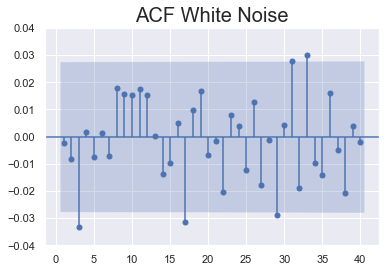

In [42]:
# now we will try to find ACF for white noise
sgt.plot_acf(df['wn'],lags=40,zero=False)
plt.title("ACF White Noise",size=20)
plt.ylim(-0.04,0.04)
plt.show()

In [ ]:
# We observed that all the values are within the blue are thus not significant across the plot'
# suggesting there is no autocorrelation for any lag
# the values are going either way,positive and negative.

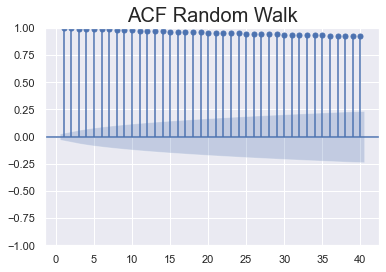

In [43]:
sgt.plot_acf(df['rw'],lags=40,zero=False)
plt.title("ACF Random Walk",size=20)
#plt.ylim(-0.04,0.04)
plt.show()

### PACF

In [44]:
# Suppose we are trying to find acf of 3rd lag with present, here the coefficient also captures the second 
# hand effects. here the indirect effects comes in form of of prices 3 days ago affecting the prices 2 days ago
# and 1 day ago, which in turn affect the price today.
# If we wish to determine the direct relationship between the time series and its lagged version we need to compute
# the partial auto correlation coefficient.

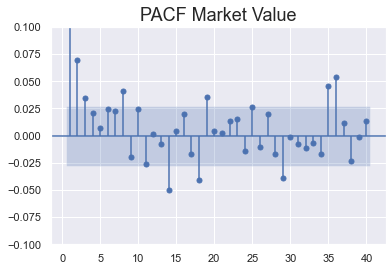

In [49]:
sgt.plot_pacf(df['market_value'],lags=40,zero=False,method=('ols'))
plt.title("PACF Market Value",size=18)
plt.ylim(-0.1,0.1)
plt.show()

In [50]:
# only the first few lags are significantly different from zero, this is in contrast to acf. Also some values
# are negative. The nineth lag is negative which means higher values nine periods ago result in lower value today.
# so here each lag shows the direct effect on present price

# PACF shows only the direct effect of price on kth lag day on present price, whereas the ACF shows the combined
# effect of kth lag, k-1, k-2, ... 3,2,1 lag on present price.
# PACF cancels out the k-1,k-2,...3,2,1 lag on present price. PACF cancels out the additional channels 
# a previous period value affects the current one

# however ACF and PACF values of first lag should be same. Also note after 3rd lag, the values are within blue area
# thus they are not significant coefficients.

(0.05, -0.05)

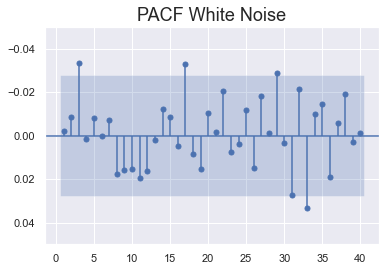

In [54]:
sgt.plot_pacf(df['wn'],lags=40,zero=False,method=('ols'))
plt.title("PACF White Noise",size=18)
plt.ylim(0.05,-0.05)

In [55]:
# thus it can be concluded (as expected) there is no autocorrelation in the white noise

(-0.05, 0.05)

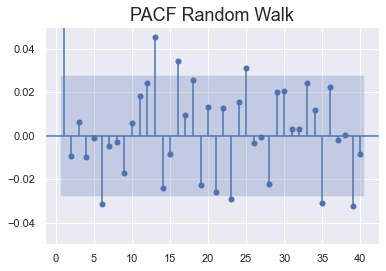

In [60]:
sgt.plot_pacf(df['rw'],lags=40,method=('ols'),zero=False)
plt.title("PACF Random Walk",size=18)
plt.ylim(-0.05,0.05)

In [ ]:
# this shows that only first lag has auto correlation, after that there is no significant correlation which 
# explains the concept of random walk data